In [1]:
import os

## switch to the root dir

In [2]:
os.chdir('..')
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'requirements.txt',
 'saved_models',
 'trainers']

In [3]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MLP import MLP
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [4]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/10-genres/')

In [5]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [6]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [7]:
print(X_train.shape)
print(y_train.shape)

torch.Size([1598, 501, 40])
torch.Size([1598])


In [8]:
print(X_val.shape)
print(y_val.shape)

torch.Size([200, 501, 40])
torch.Size([200])


In [9]:
# example on 1_D neural network
X_train = X_train.reshape((-1, 20040))
X_val = X_val.reshape((-1, 20040))

In [10]:
print(X_train[0])
print(y_train[0])

tensor([-2.2515, -1.9039, -1.6231,  ..., -1.4563, -1.3284, -1.3372])
tensor(2)


In [11]:
print(X_val.shape)
print(y_val.shape)

torch.Size([200, 20040])
torch.Size([200])


## Load model


In [12]:
model = MLP(20040, 10, [1000])

## Define loss and optimizer

In [13]:
lr = 0.05
batch_size = 200
num_epoch = 10
model_name = 'MLP'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [15]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), 
                                                                                                                            loss, optimizer, batch_size=batch_size, num_epoch=num_epoch, saved_model_name=saved_model_name, device='cuda')

Epoch  0: loss on final training batch: 9442.4043
training accuracy: 11.70% validation accuracy: 12.50%
Epoch  1: loss on final training batch: 7899.1431
training accuracy: 24.78% validation accuracy: 24.50%
Epoch  2: loss on final training batch: 6319.1182
training accuracy: 26.53% validation accuracy: 22.50%
Epoch  3: loss on final training batch: 4753.0791
training accuracy: 32.35% validation accuracy: 22.50%
Epoch  4: loss on final training batch: 3523.0518
training accuracy: 40.99% validation accuracy: 33.00%
Epoch  5: loss on final training batch: 1460.7812
training accuracy: 56.45% validation accuracy: 30.00%
Epoch  6: loss on final training batch: 655.5699
training accuracy: 65.46% validation accuracy: 39.50%
Epoch  7: loss on final training batch: 883.3682
training accuracy: 69.46% validation accuracy: 33.50%
Epoch  8: loss on final training batch: 250.6319
training accuracy: 83.29% validation accuracy: 41.00%
Epoch  9: loss on final training batch: 204.8048
training accuracy:

In [16]:
print(loss(model(X_val), y_val))

tensor(1448.3359, grad_fn=<NllLossBackward0>)


## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

In [17]:
print(loss(X_val, y_val))

tensor(10.1677)


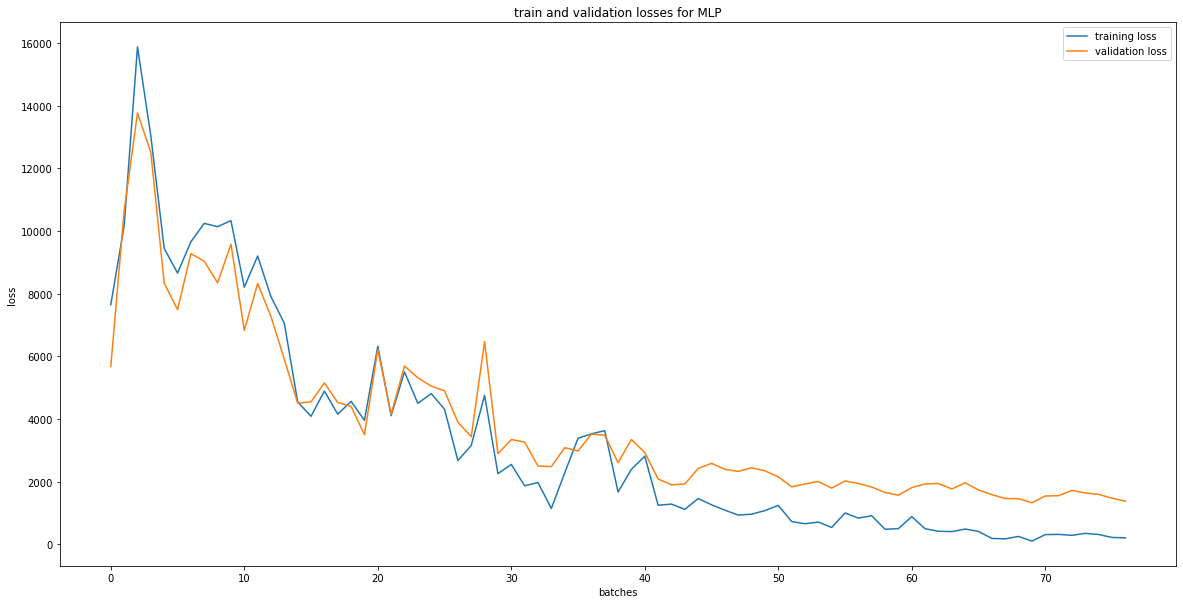

In [18]:
plot_numerical_arrays([training_loss_array[3:], validation_loss_array[3:]], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

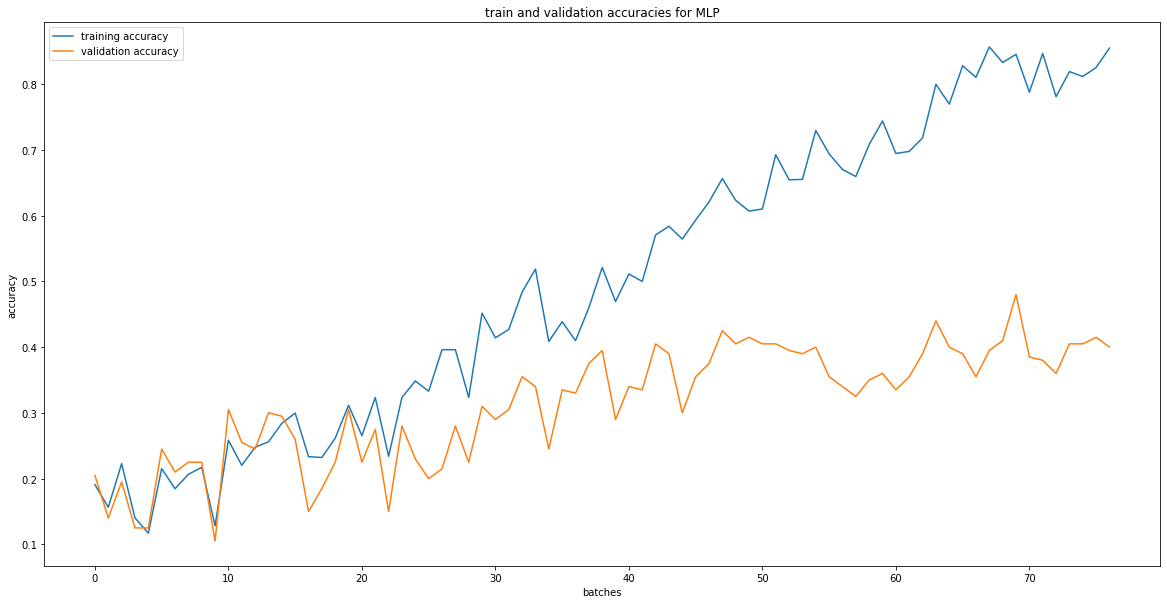

In [19]:
plot_numerical_arrays([training_accuracy_array[3:], validation_accuracy_array[3:]], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)